This notebook acts as a pipeline for the integration of single-cell RNA sequencing data. It takes in the filtered feature matrix folder from the cellranger output and outputs both merged (simply overlaid) and integrated h5ad files.

This code block is just the basic imports required for the notebook. scib and scvi are both imported later due to their optional use, simplifying the essential python environment. 

In [2]:
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

This code block reads in the matrix files into adata objects (the python equivalent to a seurat object). It then labels them by sample and merges them into one large adata object. This block requires the most manual editing of any part of the code in order to function, so make sure you update all of the read files and label changes to ensure no errors further down in the code. 

In [3]:
#Message logging and figure settings
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

#adjust the quantity and directory of the read_10x_mtx calls based on the quantity of samples you are integrating
#for example, if you had 2 samples, only keep the adata01 and 02 calls, delete the rest.
#if you have more than are in the file, more can be added by copying and changing the number on each of the steps in this block
# adata01 = sc.read_h5ad('ASCVacIntgr/mcm209_foritgr.h5ad')
# adata02 = sc.read_h5ad('ASCVacIntgr/mcm218_foritgr.h5ad')
# adata03 = sc.read_h5ad('ASCVacIntgr/mcm229_foritgr.h5ad')
# adata04 = sc.read_h5ad('ASCVacIntgr/mcm231_foritgr.h5ad')
# adata05 = sc.read_h5ad('ASCVacIntgr/mcm241_foritgr.h5ad')
# adata06 = sc.read_h5ad('ASCVacIntgr/mcm253_foritgr.h5ad')
# adata07 = sc.read_h5ad('ASCVacIntgr/mcm254_foritgr.h5ad')
# adata08 = sc.read_h5ad('ASCVacIntgr/mcm262_foritgr.h5ad')
# adata09 = sc.read_h5ad('ASCVacIntgr/mcm267_foritgr.h5ad')
# adata10 = sc.read_h5ad('ASCVacIntgr/mcm275_foritgr.h5ad')
# adata11 = sc.read_h5ad('ASCVacIntgr/mcm276_foritgr.h5ad')
# adata12 = sc.read_h5ad('ASCVacIntgr/mcm286_foritgr.h5ad')
# adata13 = sc.read_h5ad('ASCVacIntgr/mcm289_foritgr.h5ad')
# adata14 = sc.read_h5ad('ASCVacIntgr/mcm318_foritgr.h5ad')
# adata15 = sc.read_h5ad('ASCVacIntgr/mcm323_foritgr.h5ad')
# adata16 = sc.read_h5ad('ASCVacIntgr/mcm328_foritgr.h5ad')

# #Change based on your sample names and quantity
# adata01.obs['sample'] = 'mcm209'
# adata02.obs['sample'] = 'mcm218'
# adata03.obs['sample'] = 'mcm229'
# adata04.obs['sample'] = 'mcm231'
# adata05.obs['sample'] = 'mcm241'
# adata06.obs['sample'] = 'mcm253'
# adata07.obs['sample'] = 'mcm254'
# adata08.obs['sample'] = 'mcm262'
# adata09.obs['sample'] = 'mcm267'
# adata10.obs['sample'] = 'mcm275'
# adata11.obs['sample'] = 'mcm276'
# adata12.obs['sample'] = 'mcm286'
# adata13.obs['sample'] = 'mcm289'
# adata14.obs['sample'] = 'mcm318'
# adata15.obs['sample'] = 'mcm323'
# adata16.obs['sample'] = 'mcm328'

# adata01.obs['vaccine'] = 'TDAP'
# adata02.obs['vaccine'] = 'PVS-23'
# adata03.obs['vaccine'] = 'PVS-23'
# adata04.obs['vaccine'] = 'TDAP'
# adata05.obs['vaccine'] = 'TDAP'
# adata06.obs['vaccine'] = 'TDAP'
# adata07.obs['vaccine'] = 'TDAP'
# adata08.obs['vaccine'] = 'HEP-B'
# adata09.obs['vaccine'] = 'TDAP'
# adata10.obs['vaccine'] = 'TDAP'
# adata11.obs['vaccine'] = 'TDAP'
# adata12.obs['vaccine'] = 'TDAP'
# adata13.obs['vaccine'] = 'HEP-B'
# adata14.obs['vaccine'] = 'HEP-B'
# adata15.obs['vaccine'] = 'HEP-B'
# adata16.obs['vaccine'] = 'HEP-B'

adata01 = sc.read_h5ad('ASCVacIntgr/mcm287_A_foritgr.h5ad')
adata02 = sc.read_h5ad('ASCVacIntgr/mcm287_B_foritgr.h5ad')
adata03 = sc.read_h5ad('ASCVacIntgr/mcm287_D_foritgr.h5ad')

adata01.obs['sample'] = 'mcm287_A'
adata02.obs['sample'] = 'mcm287_B'
adata03.obs['sample'] = 'mcm287_D'

#Also change to match your sample names and quantity
# sample_list = ['mcm209', 'mcm218', "mcm229", "mcm231", "mcm241", "mcm253", "mcm254", "mcm262", "mcm267", "mcm275", "mcm276", "mcm286", "mcm289", "mcm318", "mcm323", "mcm328"]
sample_list = ['mcm287_A', 'mcm287_B', "mcm287_D"]

#The name of the overall group of samples - each output file will be in the format of the tool used + 'name'.h5ad
name = "mcmBMA"

results_file = "merged_" + name + '.h5ad'  # the file that will store the unintegrated analysis results

#Puts all of the individual samples into one adata object. Adjust the number of adatas depending on your sample count.
# adata = adata01.concatenate(adata02, adata03, adata04, adata05, adata06, adata07, adata08, adata09, adata10, adata11, adata12, adata13, adata14, adata15, adata16)
adata = adata01.concatenate(adata02, adata03)

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==1.5.3 scikit-learn==1.4.0 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


/scratch/489491/ipykernel_112423/2307893912.py:80: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata01.concatenate(adata02, adata03)


This block performs the initial processing on the data to filter out low quality reads and other steps such as PCA that all integration tools need before they run. 

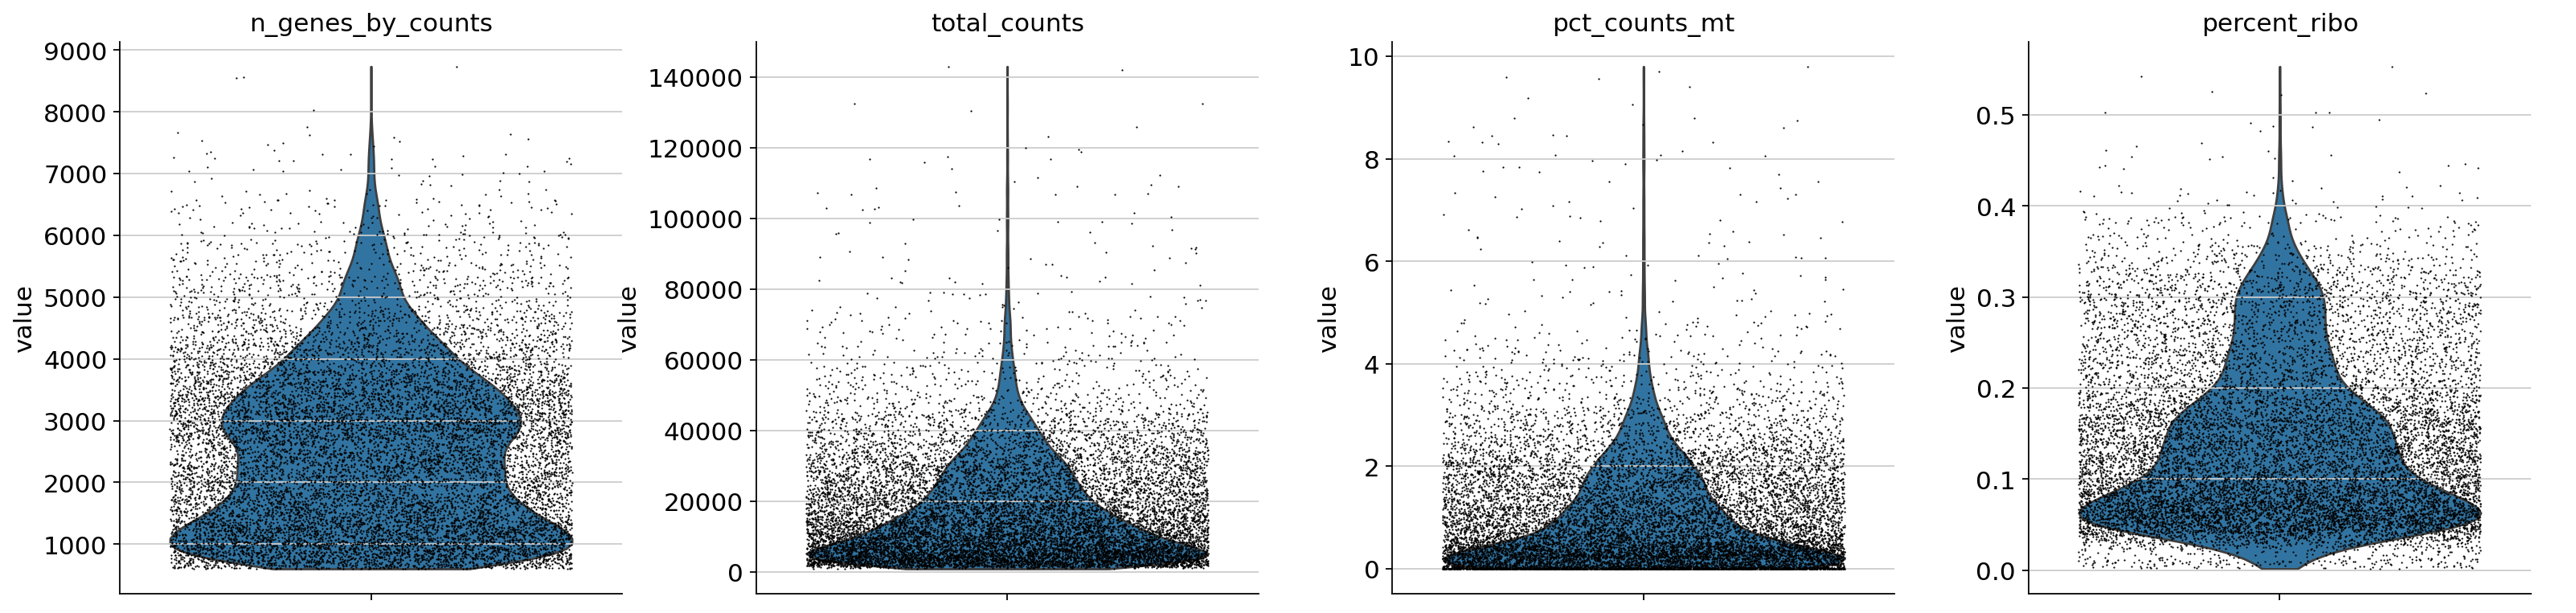

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


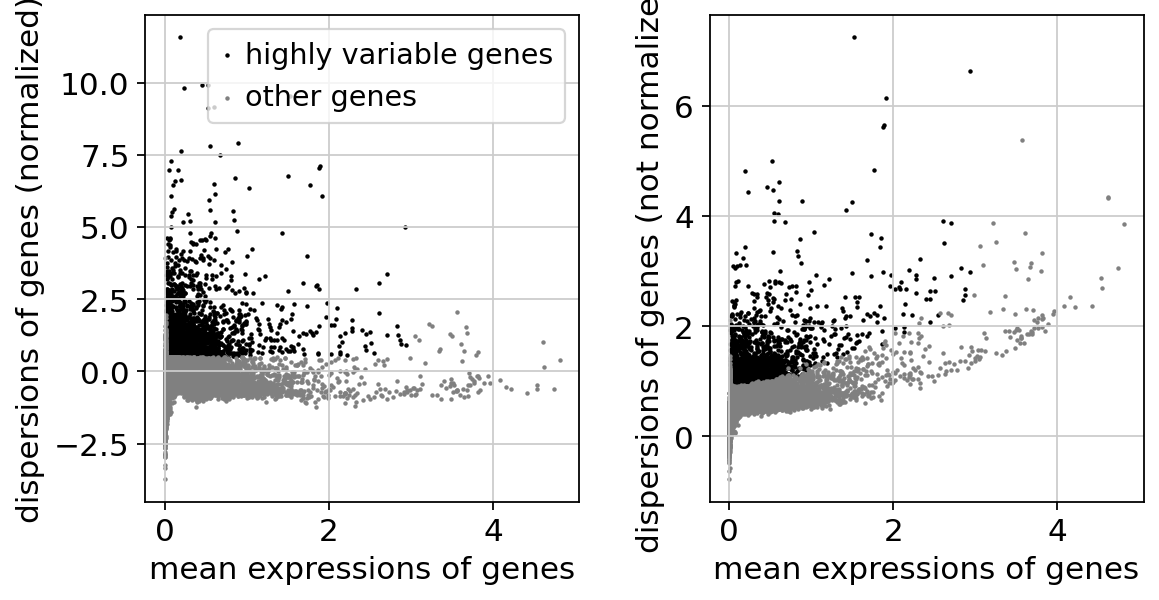

regressing out ['total_counts', 'pct_counts_mt', 'percent_ribo']
    sparse input is densified and may lead to high memory use
    finished (0:00:34)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


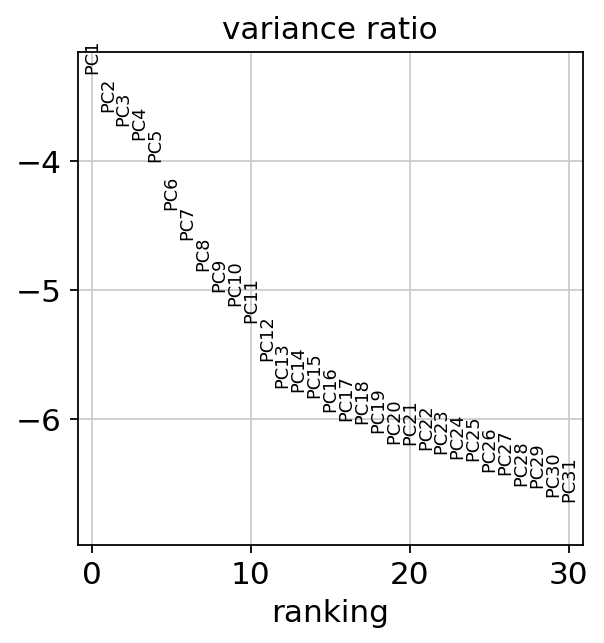

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


In [4]:
adata.layers["counts"] = adata.X.copy()

#plots the genes by counts, total counts, and mitochondrial counts violin plots
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', "percent_ribo"],
             jitter=0.4, multi_panel=True)

#normalizes and logarithmizes the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#preserves the normalized and logarithmized raw gene expression
adata.raw = adata


#finds and plots highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'sample')
#benchmark adata pre-integration utilized for scib as a reference, 
benchmark = adata.copy()
sc.pl.highly_variable_genes(adata)

#filters the adata to include only the highly variable genes
adata = adata[:, adata.var.highly_variable]

#regresses out the total counts and mitochondrial counts before doing principal component analysis
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'percent_ribo'])

#Scales each gene to unit variance and clips values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

#performs principal coponent analysis and plots the variance ratio
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

#preserves a copy of the adata object
copydata = adata.copy()

#calls the standard dimensionality reduction and clustering steps on the adata object 
# neighbors, UMAP, and leiden (clustering)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

This cell does the standard dimensionality reduction and clustering. Leiden clustering resolution should be adjusted in accordance to the elbow plot to ensure that the appropriate amount of clusters are produced. This cell can be re-run multiple times in a row to test different leiden resolutions.

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


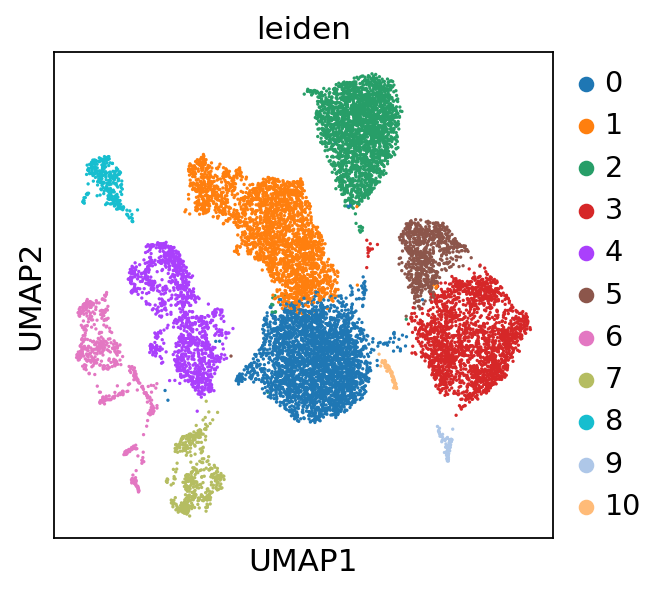

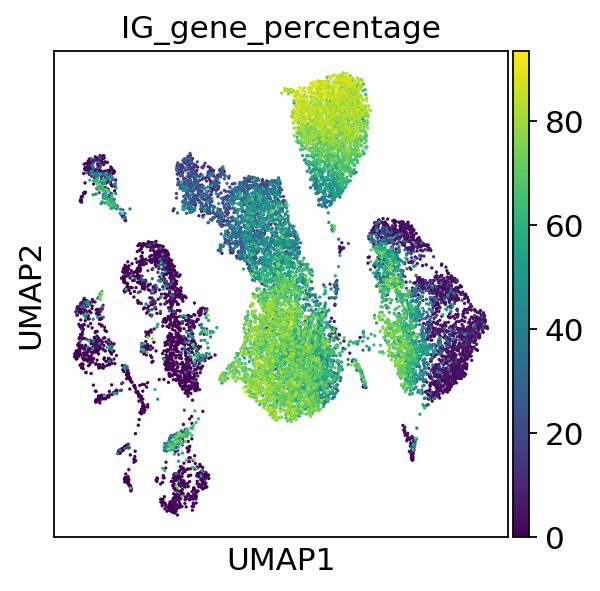

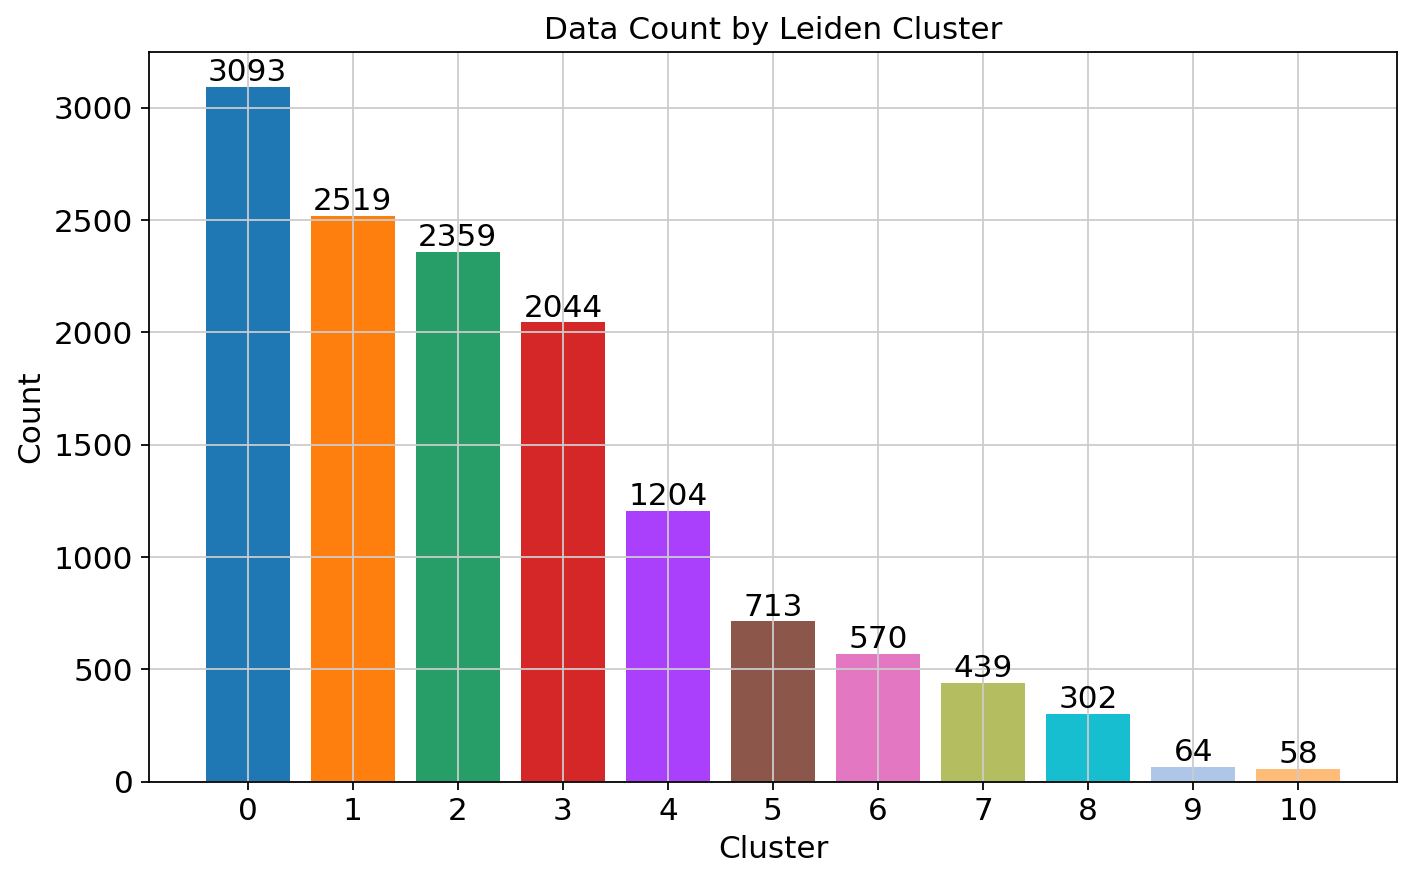

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


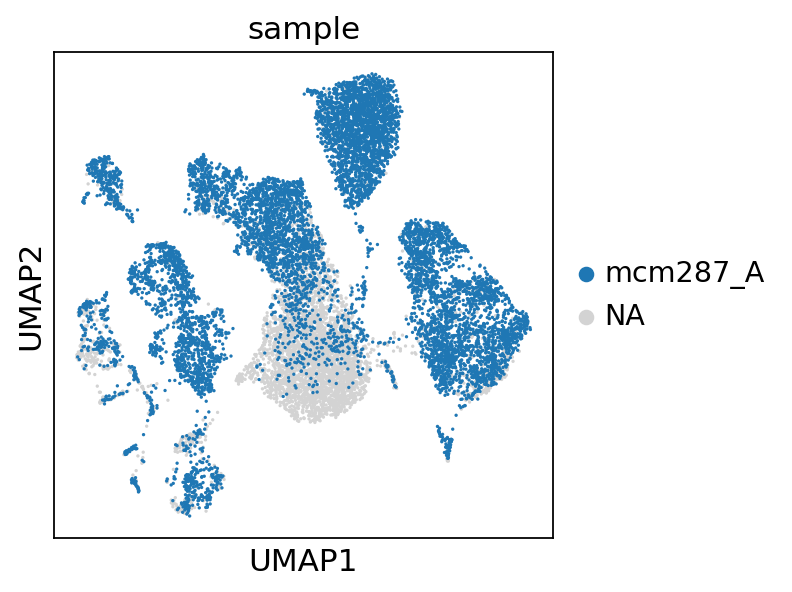

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


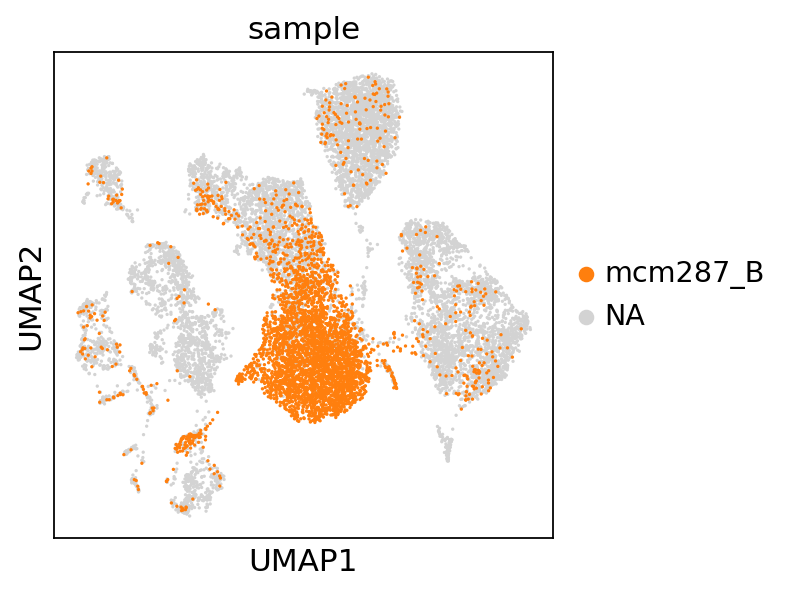

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


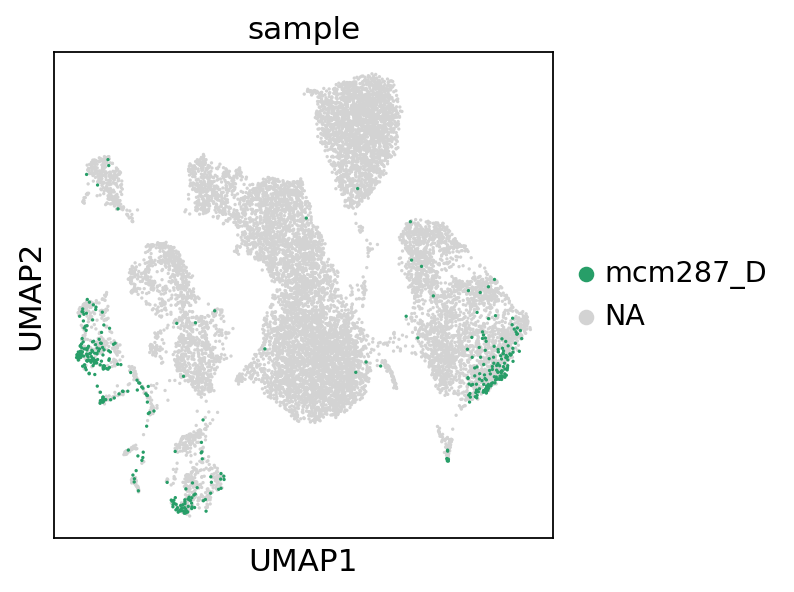

In [5]:
#clustering resolution should be adjusted to ensure that it matches the elbow plot produced above
#cut off should be around the "elbow" or corner of the plot where intra-PC variance becomes minimal
res = .2
sc.tl.leiden(adata, resolution= res, key_added = "leiden")

#plots the umap based on both sample and cluster
sc.pl.umap(adata, color = ['leiden'], hspace = 1)

# Plot UMAP and color by the percentage of IG gene expression
sc.pl.umap(adata, color=['IG_gene_percentage'])


# Extract leiden cluster information
leiden_clusters = adata.obs['leiden']
cluster_counts = leiden_clusters.value_counts().sort_index()

# Get UMAP colors for each cluster
umap_colors = adata.uns['leiden_colors']

reformed_counter = len(cluster_counts)
umap_colors = umap_colors[0: reformed_counter]

# Create a DataFrame for easy handling
df = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Color': umap_colors
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df['Cluster'], df['Count'], color=df['Color'])

# Adding count values above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')

# Customize plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Data Count by Leiden Cluster')
ax.set_xticks(np.arange(len(df['Cluster'])))
ax.set_xticklabels(df['Cluster'])

plt.show()

for sample in sample_list:
    sc.pl.umap(adata, color = 'sample', groups = [sample])
# for vaccine in ['TDAP', 'PVS-23', 'HEP-B']:
#     sc.pl.umap(adata, color = 'vaccine', groups = [vaccine])


This cell runs bbknn (Polanski et al. (2019)) in place of the standard neighbors call. It "alters the kNN procedure to identify each cell’s top neighbours in each batch separately instead of the entire cell pool with no accounting for batch. The nearest neighbours for each batch are then merged to create a final list of neighbours for the cell. Aligns batches in a quick and lightweight manner." - https://scanpy.readthedocs.io/en/stable/generated/scanpy.external.pp.bbknn.html

This is then followed with the standard UMAP and leiden procedure

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


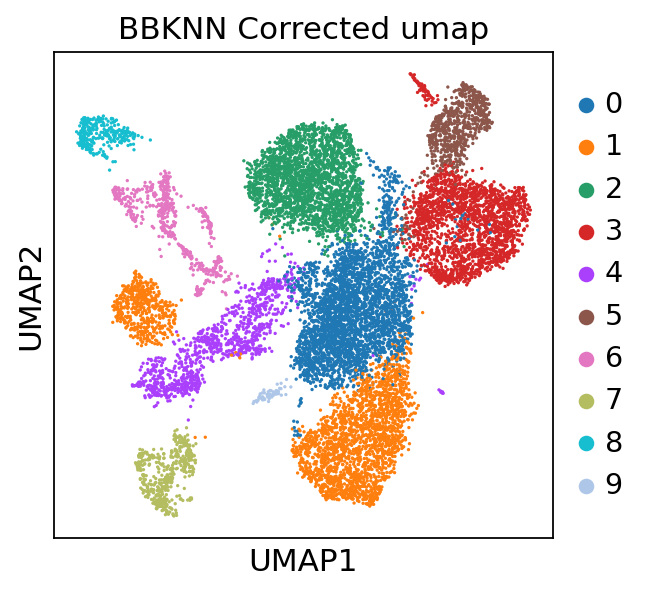

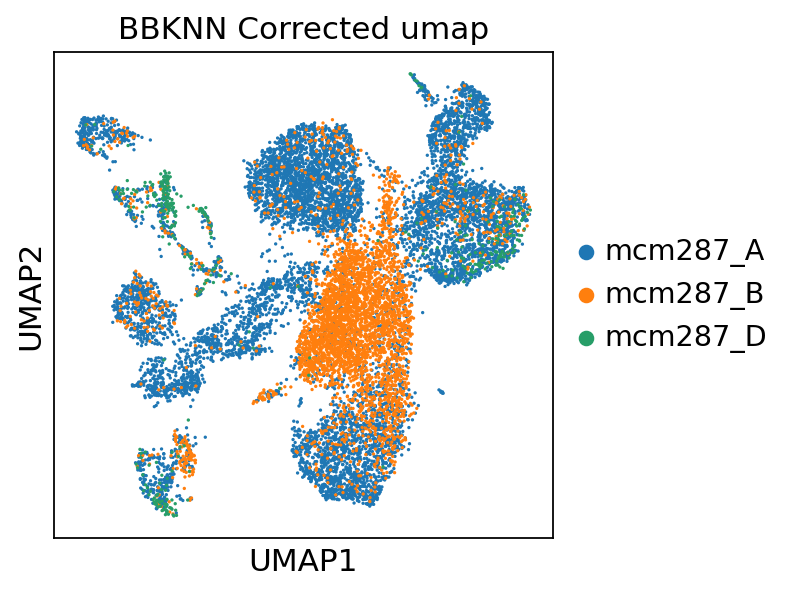

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


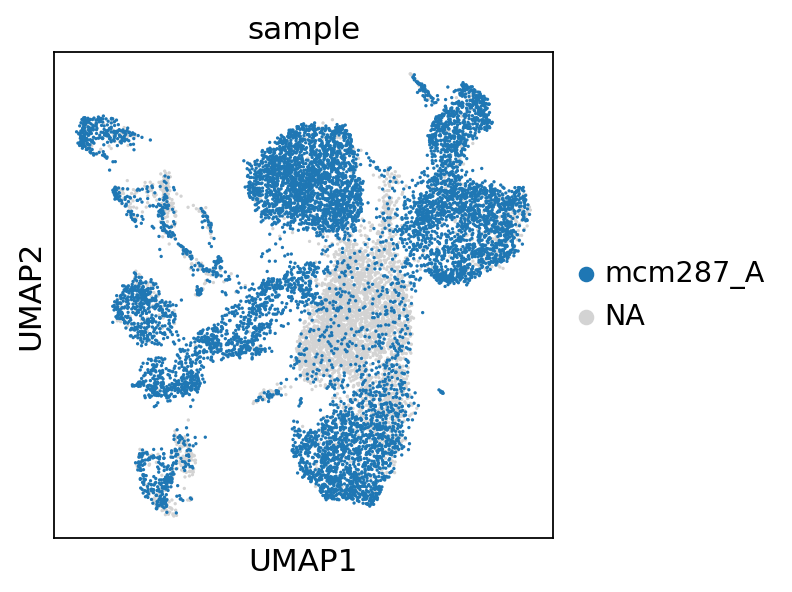

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


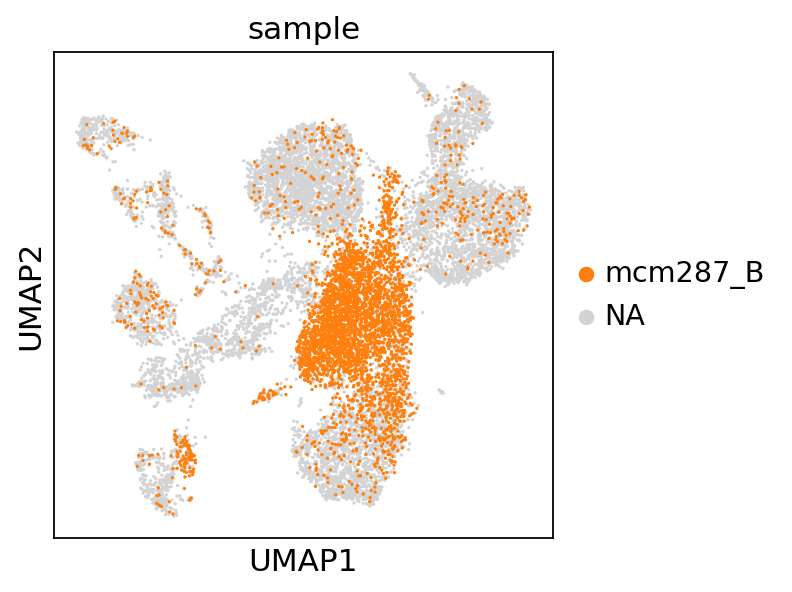

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


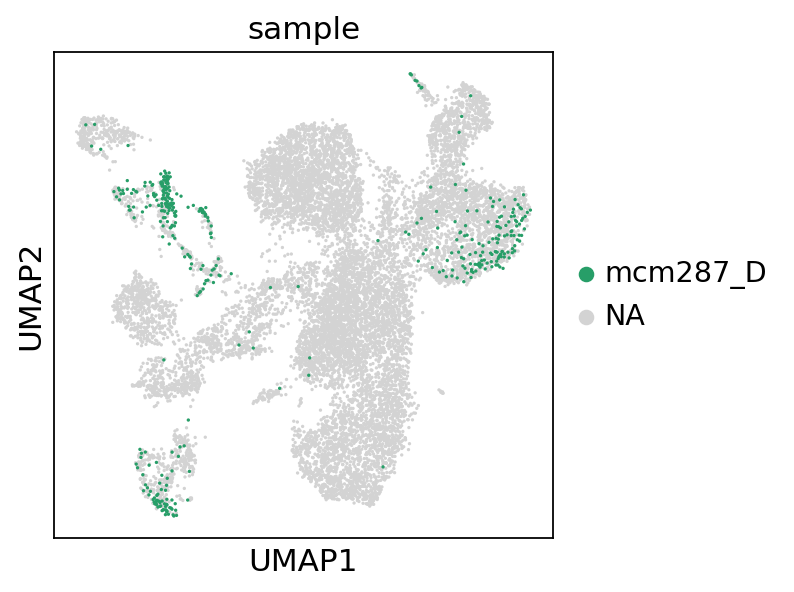

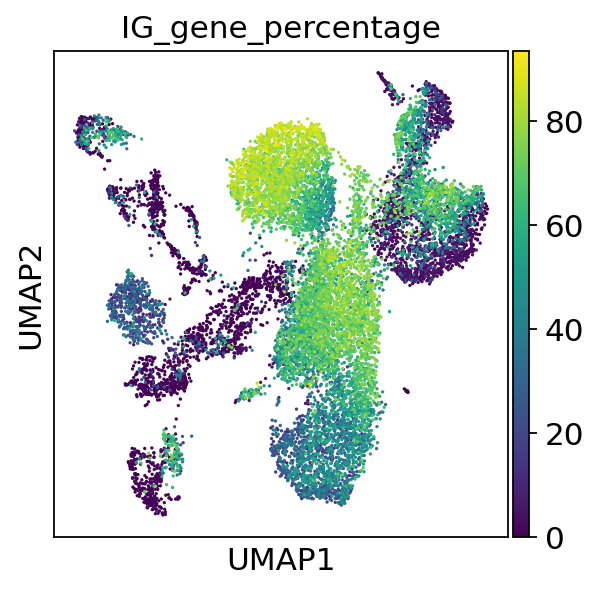

In [6]:
#loads in the saved adata copy
bbknnadata = copydata.copy()

#runs bbknn on the adata
sc.external.pp.bbknn(bbknnadata, batch_key='sample', n_pcs=30) 

# run umaps and clusters and on the integrated space
sc.tl.umap(bbknnadata)
#adjust resolution to match the cell above
sc.tl.leiden(bbknnadata, resolution= res, key_added = "leiden")

#plots the umap colored by both cluster and sample
sc.pl.umap(bbknnadata, color="leiden", title="BBKNN Corrected umap", show=False)
sc.pl.umap(bbknnadata, color="sample", title="BBKNN Corrected umap", show=False)
plt.show()

#plots the umap with just one sample colored in at a time -> useful for sample by sample location visualization
for sample in sample_list:
    sc.pl.umap(bbknnadata, color = 'sample', groups = [sample])

plt.show()
# for vaccine in ['TDAP', 'PVS-23', 'HEP-B']:
#     sc.pl.umap(bbknnadata, color = 'vaccine', groups = [vaccine])
sc.pl.umap(bbknnadata, color=['IG_gene_percentage'])
    


This cell uses scanorama to integrate the samples. Scanorama (Hie et al. 2019) adjusts the PCA to account for the different samples. The standard neighbors, umap, and leiden steps are then performed afterwards.

[[0.         0.69841682 0.97094431]
 [0.         0.         0.84261501]
 [0.         0.         0.        ]]
Processing datasets mcm287_A <=> mcm287_D
Processing datasets mcm287_B <=> mcm287_D
Processing datasets mcm287_A <=> mcm287_B
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


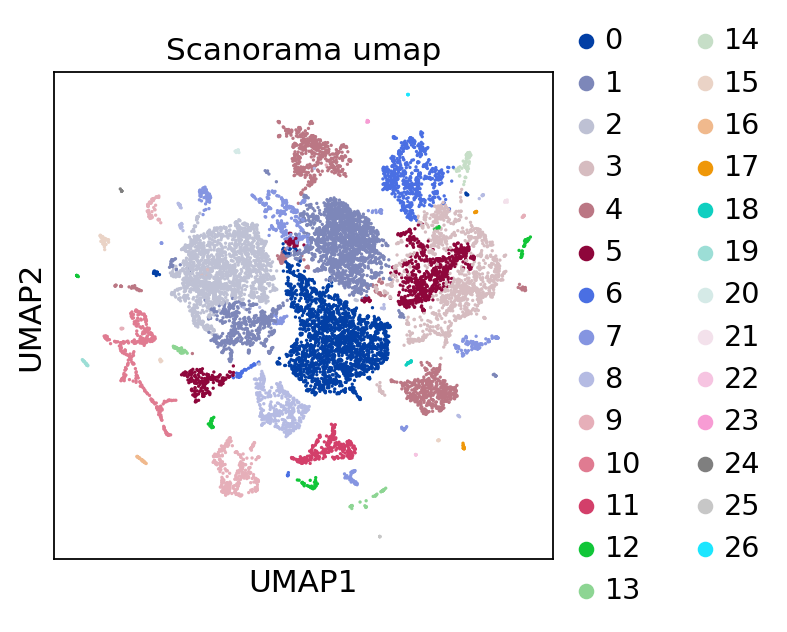

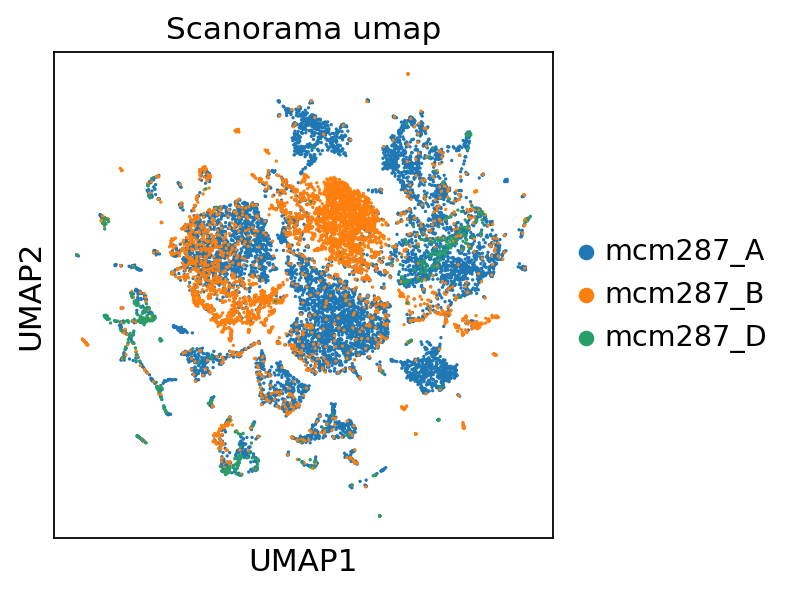

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


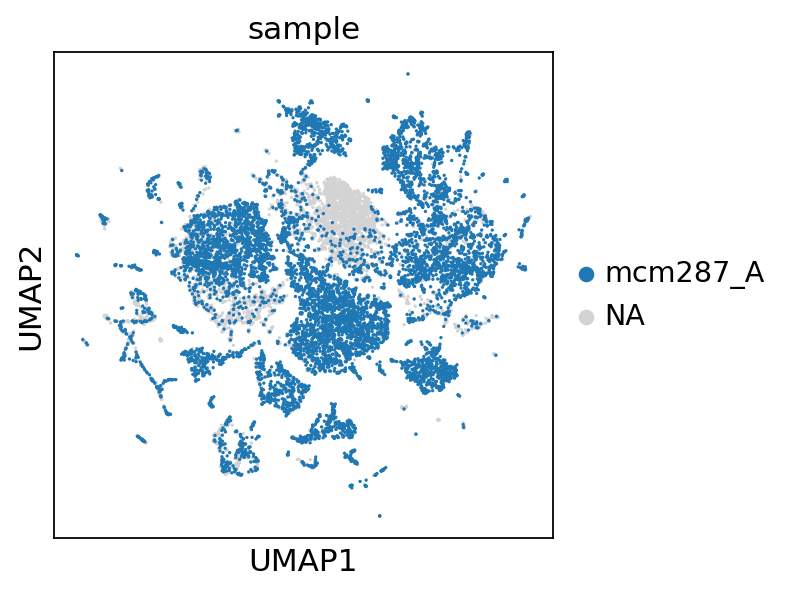

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


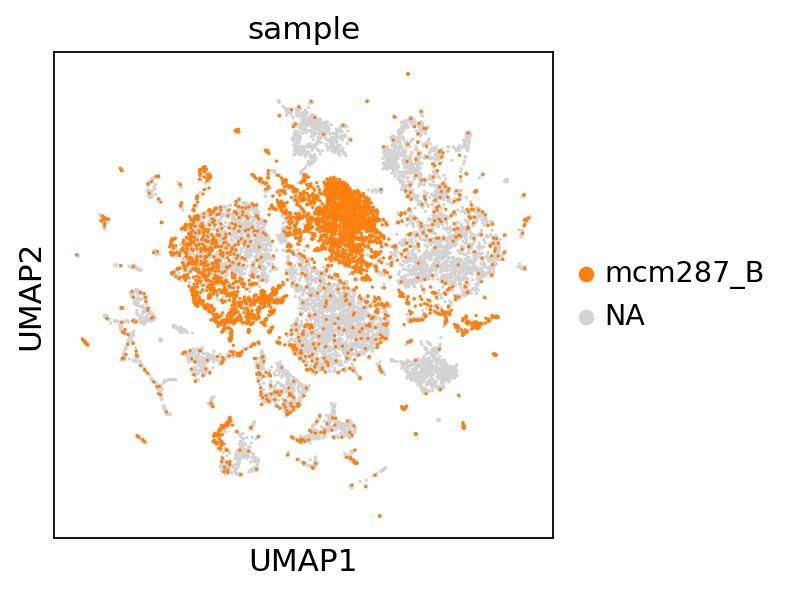

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


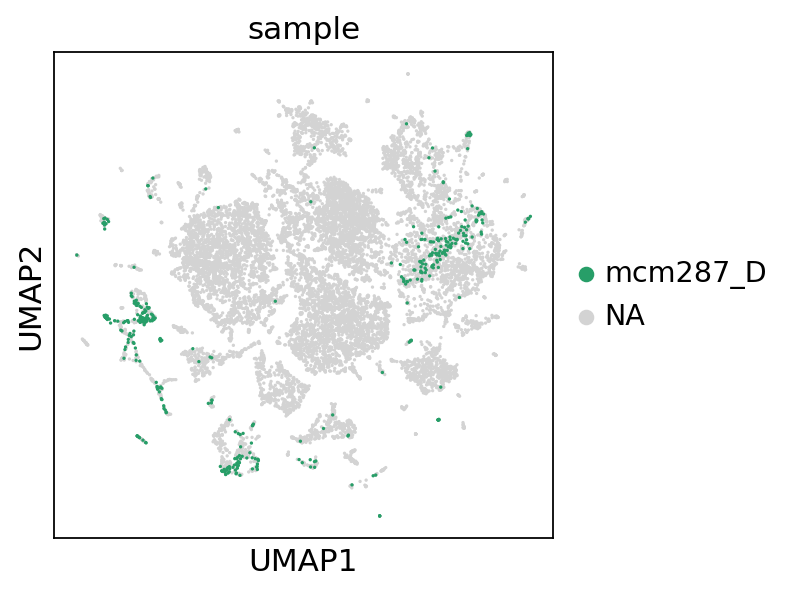

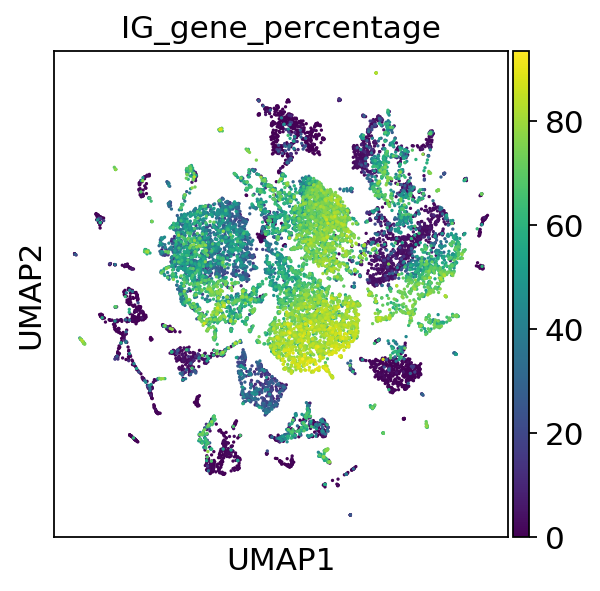

In [7]:
#loads in a copy of the adata
scadata = copydata.copy()
#runs scanorama on the data
sce.pp.scanorama_integrate(scadata, 'sample')
#calls neighbors, umap, and leiden on the data
sc.pp.neighbors(scadata, n_neighbors= 10, n_pcs =30, use_rep = "X_scanorama")
sc.tl.umap(scadata)
sc.tl.leiden(scadata, resolution= res, key_added = "leiden")

#plots the umap colored by both cluster and sample
sc.pl.umap(scadata, color="leiden", title="Scanorama umap", show=False)
sc.pl.umap(scadata, color="sample", title="Scanorama umap", show=False)

plt.show()
#plots the umap with just one sample colored in at a time -> useful for sample by sample location visualization
for sample in sample_list:
    sc.pl.umap(scadata, color = 'sample', groups = [sample])

plt.show()
# for vaccine in ['TDAP', 'PVS-23', 'HEP-B']:
#     sc.pl.umap(scadata, color = 'vaccine', groups = [vaccine])
sc.pl.umap(scadata, color=['IG_gene_percentage'])

This cell uses the python implementation of Harmony (harmonypy) (Korunsky et al. 2019) to integrate the samples by adjusting their principal component analysis. The standard dimensionality reduction and clustering steps then follow. 

2024-06-25 14:42:14,013 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-06-25 14:42:17,498 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-06-25 14:42:17,544 - harmonypy - INFO - Iteration 1 of 10
2024-06-25 14:42:19,762 - harmonypy - INFO - Iteration 2 of 10
2024-06-25 14:42:21,979 - harmonypy - INFO - Iteration 3 of 10
2024-06-25 14:42:24,195 - harmonypy - INFO - Converged after 3 iterations


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


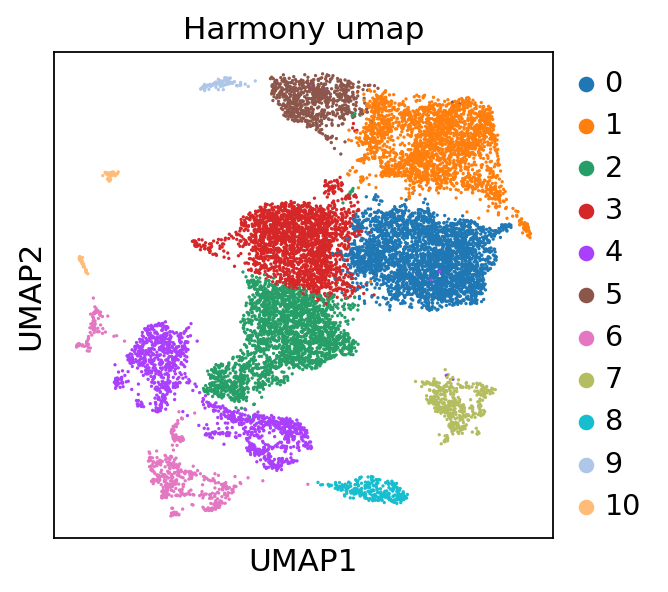

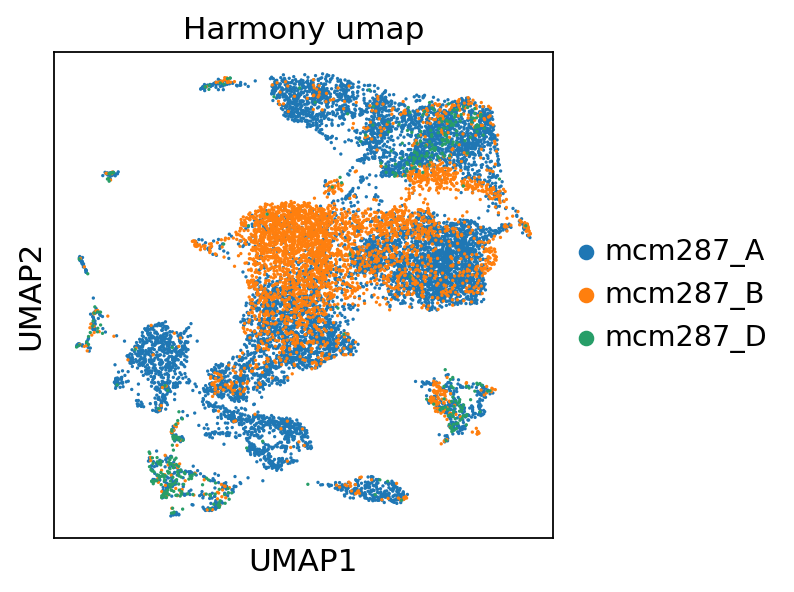

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


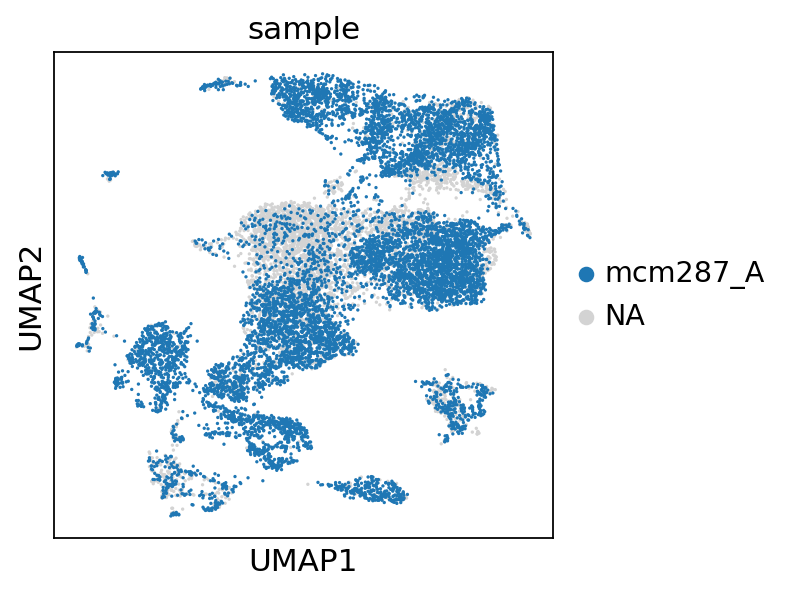

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


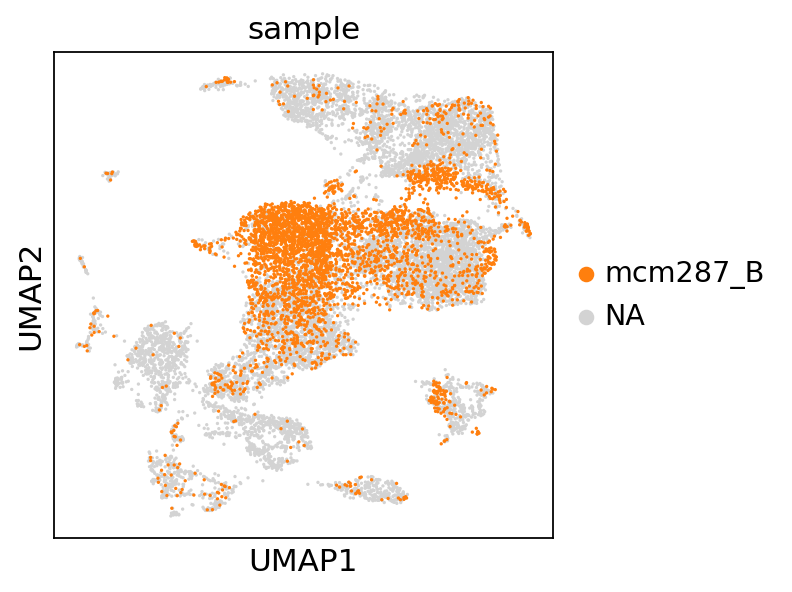

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


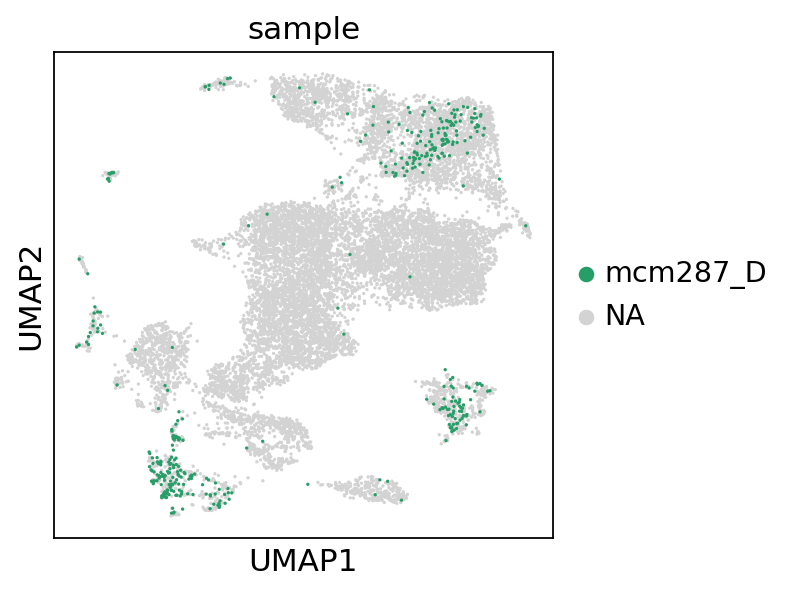

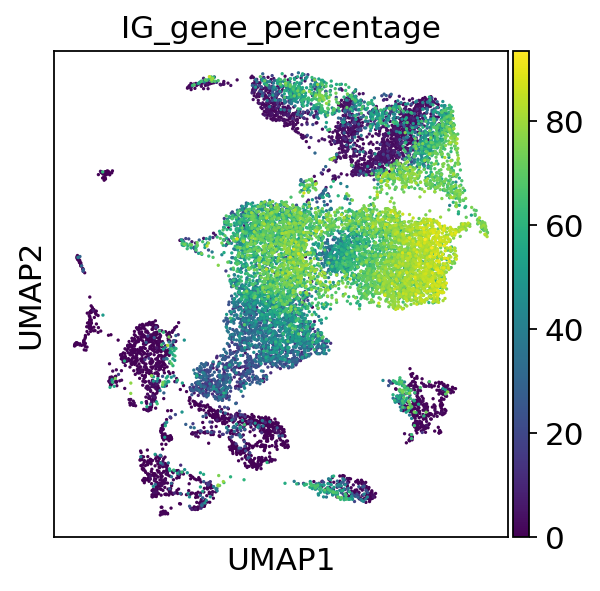

In [9]:
#loads in a copy of the adata
harmadata = copydata.copy()

#integrates the data with harmony
sce.pp.harmony_integrate(harmadata, 'sample')

#replaces the X_pca category with the harmony integrated X_pca_harmony
harmadata.obsm['X_pca'] = harmadata.obsm['X_pca_harmony']

#calls neighbors, umap, leiden
sc.pp.neighbors(harmadata, n_neighbors=10, n_pcs=30)
sc.tl.umap(harmadata)
sc.tl.leiden(harmadata, resolution= res, key_added = "leiden")

#plots the umap colored by both the clusters and the sample
sc.pl.umap(harmadata, color="leiden", title="Harmony umap", show=False)
sc.pl.umap(harmadata, color="sample", title="Harmony umap", show=False)
plt.show()
#plots the umap with just one sample colored in at a time -> useful for sample by sample location visualization
for sample in sample_list:
    sc.pl.umap(harmadata, color = 'sample', groups = [sample])

plt.show()
# for vaccine in ['TDAP', 'PVS-23', 'HEP-B']:
#     sc.pl.umap(harmadata, color = 'vaccine', groups = [vaccine])
sc.pl.umap(harmadata, color=['IG_gene_percentage'])


Note: This module is still being tested by me. It may not work.
scVI is a toolkit of multiple generative models for scRNA-seq count data. It requires a GPU to effectively use, so only run the module on machines with a GPU or High Performance Computing clusters with GPU functionality. It embeds the corrected matrices and then runs the neighbors, leiden, and mde (a gpu accelerated version of UMAP)

In [10]:
import scvi

#loads in a copy of the adata object
scvidata = copydata.copy()

#sets up the SCVI model
scvi.model.SCVI.setup_anndata(scvidata, layer="counts", batch_key="sample")

#runs the model on the adata
model = scvi.model.SCVI(scvidata, n_layers=2, n_latent=30, gene_likelihood="nb")
model.train()

#adds the correction into the adata object
SCVI_LATENT_KEY = "X_scVI"
scvidata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

#runs neighbors using the correction as opposed to the standard PCA output
sc.pp.neighbors(scvidata, use_rep=SCVI_LATENT_KEY)

#calls leiden clustering
sc.tl.leiden(scvidata, resolution = res, key_added = "leiden")



<frozen abc>:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|██████████| 400/400 [04:59<00:00,  1.38it/s, v_num=1, train_loss_step=874, train_loss_epoch=924]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:59<00:00,  1.33it/s, v_num=1, train_loss_step=874, train_loss_epoch=924]
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


In [ ]:
#runs the mde (gpu accelerated UMAP) on the adata object

SCVI_MDE_KEY = "X_scVI_MDE"
scvidata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(scvidata.obsm[SCVI_LATENT_KEY])

sc.set_figure_params(figsize = (8,6))
#plots the embedding by sample and cluster
sc.pl.embedding(
    scvidata,
    basis=SCVI_MDE_KEY,
    color=["sample", "leiden"],
    frameon=False,
    ncols=1,
)



computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:15)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


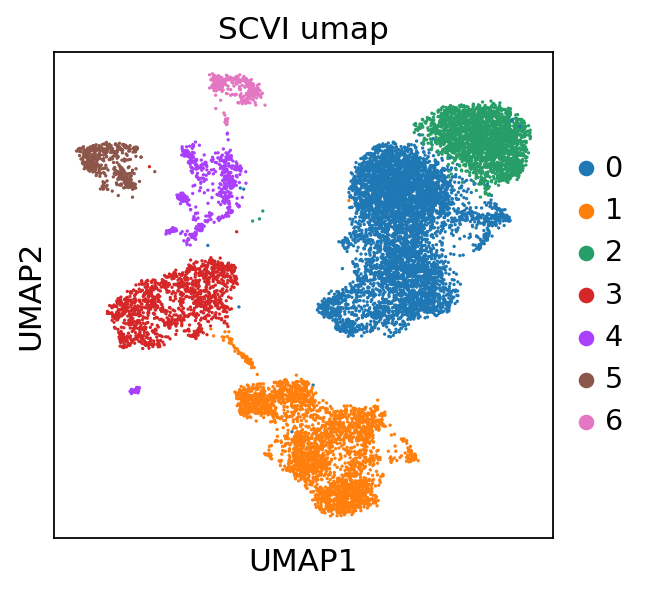

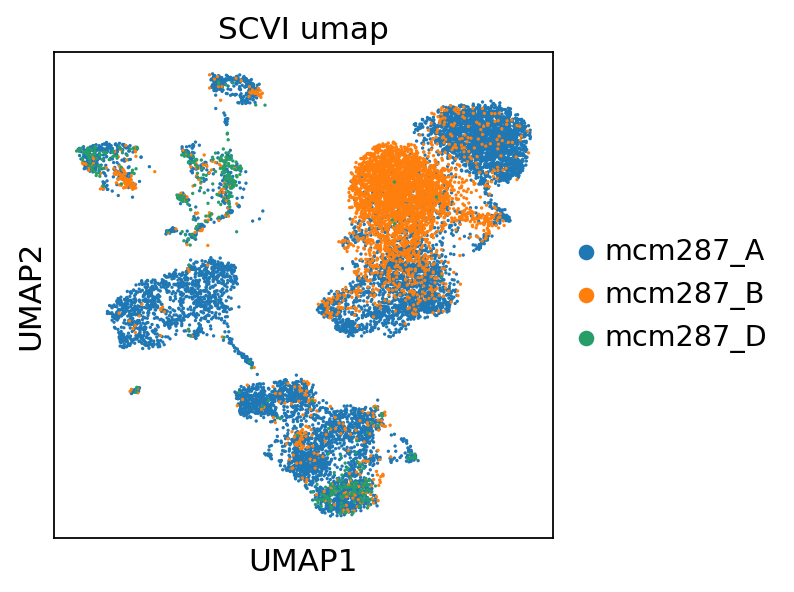

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


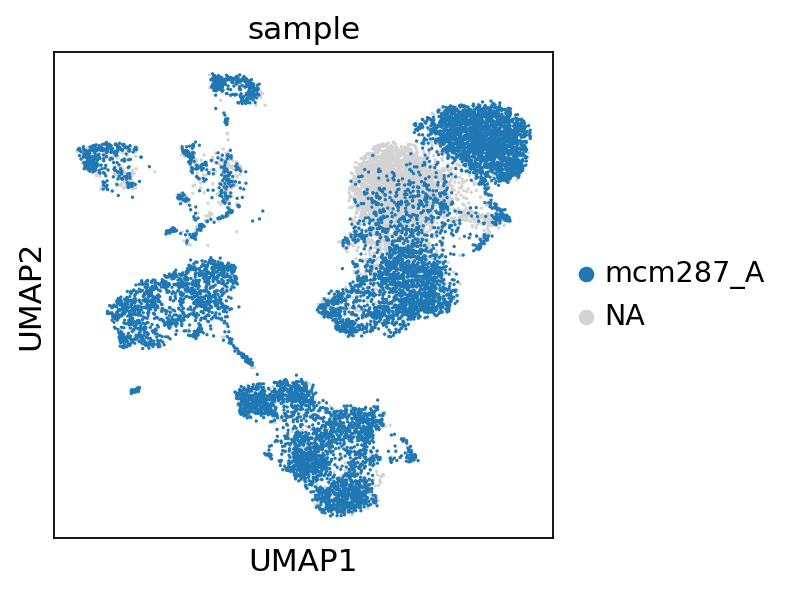

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


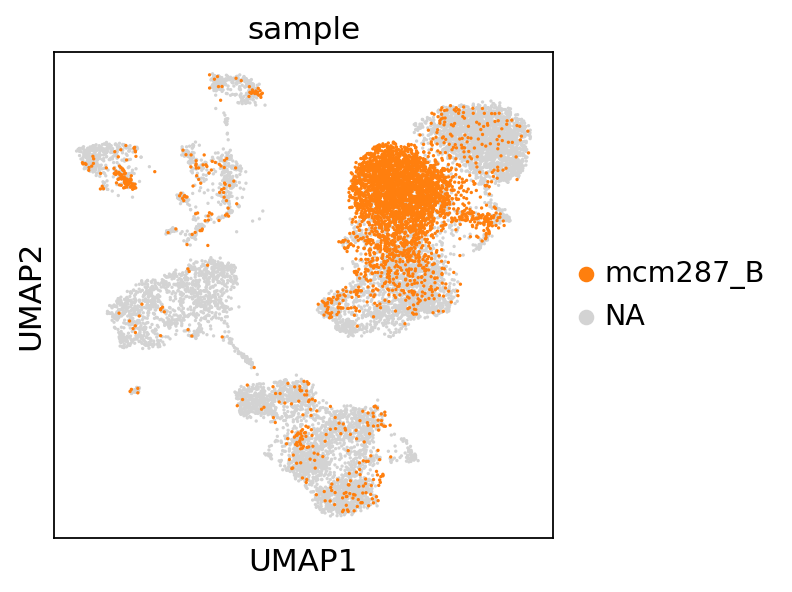

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


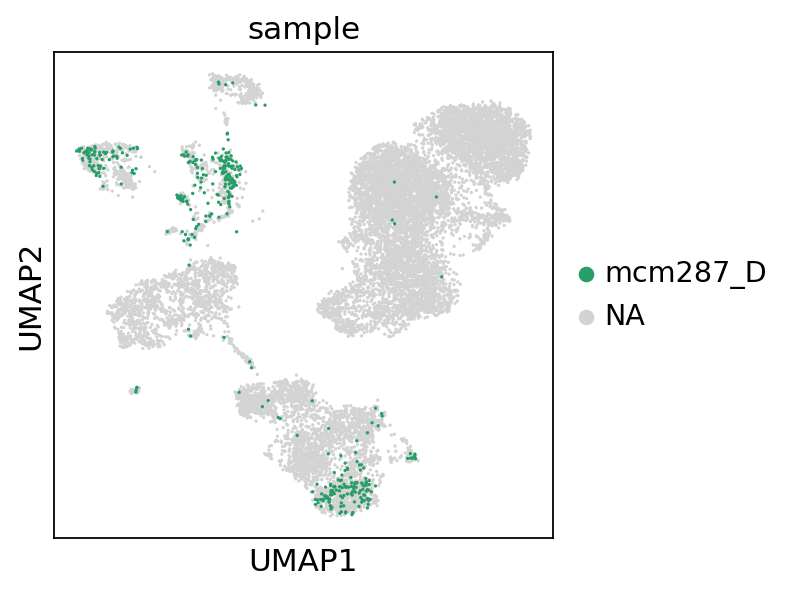

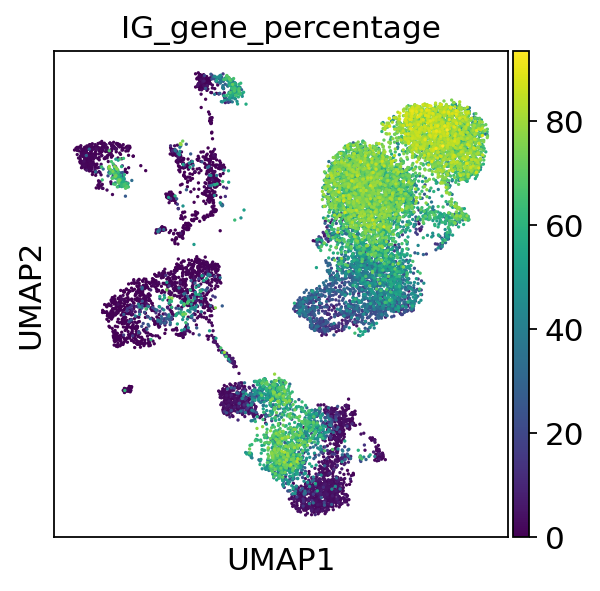

In [12]:
sc.tl.umap(scvidata)
sc.tl.leiden(scvidata, resolution = res, key_added = "leiden")
sc.pl.umap(scvidata, color="leiden", title="SCVI umap", show=False)
sc.pl.umap(scvidata, color="sample", title="SCVI umap", show=False)

plt.show()
#plots the umap with just one sample colored in at a time -> useful for sample by sample location visualization
for sample in sample_list:
    sc.pl.umap(scvidata, color = 'sample', groups = [sample])

plt.show()
# for vaccine in ['TDAP', 'PVS-23', 'HEP-B']:
#     sc.pl.umap(scvidata, color = 'vaccine', groups = [vaccine])
sc.pl.umap(scvidata, color=['IG_gene_percentage'])

This module runs the scib package, which was designed and used in Luecken et al. "Benchmarking atlas-level data integration in single-cell genomics". It is designed to determine the efficacy of an integration method on both removing batch effect while also conserving biological variance. This is an optional step that can be used to help assist the user in selecting an integration method.
 

In [13]:
import scib
metrics_scvi = scib.metrics.metrics(
    benchmark, scvidata, batch_key = 'sample', embed="X_scVI", label_key = "sample", hvg_score_ = True, pcr_ = True, graph_conn_ = True 
)
metrics_scanorama = scib.metrics.metrics(
    benchmark, scadata, batch_key = 'sample', embed="X_scanorama", label_key = "sample", hvg_score_ = True, pcr_ = True, graph_conn_ = True
)
metrics_bbknn = scib.metrics.metrics(benchmark, bbknnadata, batch_key = 'sample', label_key = "sample", hvg_score_ = True, pcr_ = True, graph_conn_ = True)
metrics_harmony = scib.metrics.metrics(benchmark, harmadata, batch_key = 'sample', label_key = "sample", hvg_score_ = True, pcr_ = True, graph_conn_ = True)
metrics = pd.concat(
    [metrics_scvi, metrics_scanorama, metrics_bbknn, metrics_harmony],
    axis="columns",
)
# Set methods as column names
metrics = metrics.set_axis(
    ["SCVI", "scanorama", "BBKNN", "harmony"], axis="columns"
)
# Select only the fast metrics
metrics = metrics.loc[
    [
        "PCR_batch",
        "graph_conn",
        "hvg_overlap",
    ],
    :,
]
# Transpose so that metrics are columns and methods are rows


PC regression...
computing PCA
    with n_comps=50


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:34)
computing PCA
    with n_comps=30
    finished (0:00:00)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


Graph connectivity...


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` 

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
PC regression...
computing PCA
    with n_comps=50


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:28)
computing PCA
    with n_comps=50
    finished (0:00:00)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


Graph connectivity...


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` 

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
PC regression...
computing PCA
    with n_comps=50


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:34)
computing PCA
    with n_comps=50


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:01)
Graph connectivity...


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` 

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
PC regression...
computing PCA
    with n_comps=50


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:35)
computing PCA
    with n_comps=50


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:01)
Graph connectivity...


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` 

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)


/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [14]:
metrics = metrics.T

metrics
metrics.style.background_gradient(cmap="Blues")
metrics_scaled = (metrics - metrics.min()) / (metrics.max() - metrics.min())
metrics_scaled.style.background_gradient(cmap="Blues")
metrics_scaled["Batch"] = metrics_scaled[
    ["hvg_overlap", "PCR_batch", "graph_conn"]
].mean(axis=1)

metrics
# fig, ax = plt.subplots()
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# metrics_scaled.plot.scatter(
#     x="Batch",
#     y="Bio",
#     c=range(len(metrics_scaled)),
#     ax=ax,
# )

# for k, v in metrics_scaled[["Batch", "Bio"]].iterrows():
#     ax.annotate(
#         k,
#         v,
#         xytext=(6, -3),
#         textcoords="offset points",
#         family="sans-serif",
#         fontsize=12,
#     )
# metrics_scaled["Overall"] = 0.4 * metrics_scaled["Batch"] + 0.6 * metrics_scaled["Bio"]
# metrics_scaled.style.background_gradient(cmap="Blues")
# metrics_scaled.plot.bar(y="Overall")

/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/storage/home/hcoda1/0/cconnors8/.conda/envs/intg/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


PCR_batch  graph_conn  hvg_overlap
SCVI        0.745677    0.840278     0.278667
scanorama   0.733071    0.707083     0.278667
BBKNN       0.682713    0.776436     0.278667
harmony     0.682713    0.739197     0.278667

This cell compares the cluster assignments for each cell between the integration methods. More blocks can be added for more integration methods by simply copying one and repacing the label names and calls. Note that labels1 will be the y axis and labels2 will be the x axis. 

In [ ]:
labels1 = bbknnadata.obs['leiden']
labels2 = harmadata.obs['leiden']
cmtx = pd.crosstab(labels2, labels1)
ncmtx1 = cmtx.div(cmtx.sum(axis=1), axis=0)
count_greater_than_08 = (ncmtx1 >= 0.8).sum().sum()
max_rows_columns = (ncmtx1.shape[0])
plt.subplots(figsize=(10,7))
ax = sns.heatmap(ncmtx1, annot=True)
ax.set(xlabel = 'harmony', ylabel = 'bbknn', title = (f"harmony vs bbknn cluster assignment: Number of clusters with >=80% cell congruency: {count_greater_than_08} / {max_rows_columns}"))
plt.show()


labels1 = bbknnadata.obs['leiden']
labels2 = scvidata.obs['leiden']
cmtx = pd.crosstab(labels2, labels1)
ncmtx2 = cmtx.div(cmtx.sum(axis=1), axis=0)
count_greater_than_08 = (ncmtx2 >= 0.8).sum().sum()
max_rows_columns = (ncmtx2.shape[0])
plt.subplots(figsize=(10,7))
ax = sns.heatmap(ncmtx2, annot=True)
ax.set(xlabel = 'scanorama', ylabel = 'bbknn', title = (f"scvi vs bbknn cluster assignment: Number of clusters with >=80% cell congruency: {count_greater_than_08} / {max_rows_columns}"))
plt.show()


labels1 = scvidata.obs['leiden']
labels2 = harmadata.obs['leiden']
cmtx = pd.crosstab(labels2, labels1)
ncmtx3 = cmtx.div(cmtx.sum(axis=1), axis=0)
count_greater_than_08 = (ncmtx3 >= 0.8).sum().sum()
max_rows_columns = (ncmtx3.shape[0])
plt.subplots(figsize=(10,7))
ax = sns.heatmap(ncmtx3, annot=True)
ax.set(xlabel = 'harmony', ylabel = 'scanorama', title = (f"harmony vs scvi cluster assignment: Number of clusters with >=80% cell congruency: {count_greater_than_08} / {max_rows_columns}"))




This block saves the adatas into h5ad files in the directory.

In [15]:
# for data in [bbknnadata, harmadata, scadata, scvidata]:
#     del data.var['gene_biotype']
bbknnadata.write_h5ad('BBKNN' + name + '.h5ad')
harmadata.write_h5ad('harmony' + name + '.h5ad')
# scadata.write_h5ad('scanorama' + name + '.h5ad')
scvidata.write_h5ad('scvi' + name + '.h5ad')